<a href="https://colab.research.google.com/github/heysourin/NLP-101/blob/main/NLP%20Specialization/%20Course%201/%20Week%201/1_Natural_Language_Processing_with_Classification_and_Vector_Spaces_Week_1_C1W1_L1_Natural_language_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))
# means [str, str, str ... ]

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


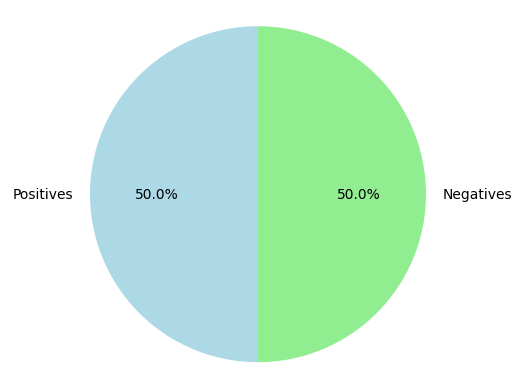

In [10]:
labels = ['Positives', 'Negatives']

sizes = [len(all_positive_tweets), len(all_negative_tweets)]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [11]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@hayley_gibson93 hi hayley. :-) can I ask is your #BellyButton an #Innie or an #Outie?
@wittykrushnic don't go :(


## **Preprocess raw text for Sentiment analysis:**

In [13]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
tweet

'My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i'

In [14]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

## **Remove hyperlinks, Twitter marks and styles:**

In [19]:
print('\033[92m' + tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [18]:
tweet2 = re.sub(r'^RT[\s]+', '', tweet) # removes Retweet marks
tweet2 = re.sub(r'https?://(?:www\.)?\w+\.\w+(?:/\S*)?', '', tweet2) # removes hyperlink marks
tweet2 = re.sub(r'#', '', tweet2)

tweet2

'My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… '

## **Tokenize the string:**

In [26]:
print("Before:\n", tweet2)

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)
print("\nAfter:\n", tweet_tokens)

Before:
 My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

After:
 ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## **Remove stopwords and punctuation:**

In [27]:
stopwords_english = stopwords.words('english')

print('Stop words\n', stopwords_english)
print('\nPunctuation\n', string.punctuation)

Stop words
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

---
- We can see that the stop words list above contains some words that could be important in some contexts. These could be words like i, not, between, because, won, against. You might need to customize the stop words list for some applications. For
---

In [32]:
print("Tweet tokens before:\n", tweet_tokens)

tweets_clean = []

for word in tweet_tokens:
  if(word not in stopwords_english and word not in string.punctuation):
    tweets_clean.append(word)

print("\nTweet tokens after:\n", tweets_clean)

Tweet tokens before:
 ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

Tweet tokens after:
 ['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


## **Stemming:**

In [38]:
print("Before Stemming:\n", tweets_clean)

stemmer = PorterStemmer()

tweets_stems = []

for word in tweets_clean:
  stem_word = stemmer.stem(word)
  tweets_stems.append(stem_word)

print("\nAfter Stemming:\n", tweets_stems)

Before Stemming:
 ['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

After Stemming:
 ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
